In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prem_data = pd.read_csv("Premier League 21-22 data.csv")
prem_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [3]:
prem_data.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [4]:
prem_data.columns = ['date', 'home_team', 'away_team', 'full_time_home_goals', 
 'full_time_away_goals', 'full_time_result', 'half_time_home_goals', 
 'half_time_away_goals','half_time_results', 'referee',
 'home_shot', 'away_shot', 'home_shot_target', 'away_shot_target',
 'home_fouls', 'away_fouls', 'home_corner', 'away_corner', 
 'home_yellow', 'away_yellow', 'home_red', 'away_red']

prem_data.head()

,date,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_results,referee,...,home_shot_target,away_shot_target,home_fouls,away_fouls,home_corner,away_corner,home_yellow,away_yellow,home_red,away_red
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [5]:
# formating column names
prem_data.columns = prem_data.columns.str.replace("away", "a").str.replace("home", "h")
prem_data.head(1)

,date,h_team,a_team,full_time_h_goals,full_time_a_goals,full_time_result,half_time_h_goals,half_time_a_goals,half_time_results,referee,...,h_shot_target,a_shot_target,h_fouls,a_fouls,h_corner,a_corner,h_yellow,a_yellow,h_red,a_red
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0


In [6]:
# checking data types of each column
prem_data.dtypes

date                 object
h_team               object
a_team               object
full_time_h_goals     int64
full_time_a_goals     int64
full_time_result     object
half_time_h_goals     int64
half_time_a_goals     int64
half_time_results    object
referee              object
h_shot                int64
a_shot                int64
h_shot_target         int64
a_shot_target         int64
h_fouls               int64
a_fouls               int64
h_corner              int64
a_corner              int64
h_yellow              int64
a_yellow              int64
h_red                 int64
a_red                 int64
dtype: object

In [7]:
# checking for nan values
prem_data.isnull().sum()

date                 0
h_team               0
a_team               0
full_time_h_goals    0
full_time_a_goals    0
full_time_result     0
half_time_h_goals    0
half_time_a_goals    0
half_time_results    0
referee              0
h_shot               0
a_shot               0
h_shot_target        0
a_shot_target        0
h_fouls              0
a_fouls              0
h_corner             0
a_corner             0
h_yellow             0
a_yellow             0
h_red                0
a_red                0
dtype: int64

### Trying to answer the following questions from the data

* Was there a correlation between number of shots and total points?
* Was there a correlation between number of corners and points?
* was there a correlation between number of fouls commited and points?

### Filtering some of the data to only remain with those features we need

In [8]:
table = pd.DataFrame(prem_data["h_team"].unique(), columns = ["teams"])
table.head()

,teams
0,Brentford
1,Man United
2,Burnley
3,Chelsea
4,Everton


In [9]:
table[["fouls", "yellow_cards", "red_cards", "FT_goals_scored", "HT_goals_scored", "total_shots", "shots_on_target", \
       "corners", "points"]] = 0
table.head()

,teams,fouls,yellow_cards,red_cards,FT_goals_scored,HT_goals_scored,total_shots,shots_on_target,corners,points
0,Brentford,0,0,0,0,0,0,0,0,0
1,Man United,0,0,0,0,0,0,0,0,0
2,Burnley,0,0,0,0,0,0,0,0,0
3,Chelsea,0,0,0,0,0,0,0,0,0
4,Everton,0,0,0,0,0,0,0,0,0


In [10]:
table.set_index("teams", inplace = True)
table.head()

,fouls,yellow_cards,red_cards,FT_goals_scored,HT_goals_scored,total_shots,shots_on_target,corners,points
teams,,,,,,,,,
Brentford,0,0,0,0,0,0,0,0,0
Man United,0,0,0,0,0,0,0,0,0
Burnley,0,0,0,0,0,0,0,0,0
Chelsea,0,0,0,0,0,0,0,0,0
Everton,0,0,0,0,0,0,0,0,0


In [11]:
#  filtering
for i in prem_data.index:
    home = prem_data.loc[i, "h_team"]
    away = prem_data.loc[i, "a_team"]
#     adding number of fouls
    a_fouls = prem_data.loc[i, "a_fouls"]
    h_fouls = prem_data.loc[i, "h_fouls"]
    table.loc[home, "fouls"] += h_fouls
    table.loc[away, "fouls"] += a_fouls
#     adding number of yellow cards
    a_ycards = prem_data.loc[i, "a_yellow"]
    h_ycards = prem_data.loc[i, "h_yellow"]
    table.loc[home, "yellow_cards"] += h_ycards
    table.loc[away, "yellow_cards"] += a_ycards
#     adding number of red cards
    a_rcards = prem_data.loc[i, "a_red"]
    h_rcards = prem_data.loc[i, "h_red"]
    table.loc[home, "red_cards"] += h_rcards
    table.loc[away, "red_cards"] += a_rcards
# adding fulltime goals scored by each team
    fta_goals = prem_data.loc[i, "full_time_a_goals"]
    fth_goals = prem_data.loc[i, "full_time_h_goals"]
    table.loc[away, "FT_goals_scored"] += fta_goals
    table.loc[home, "FT_goals_scored"] += fth_goals
#     adding halftime goals scored by each team
    hta_goals = prem_data.loc[i, "half_time_a_goals"]
    hth_goals = prem_data.loc[i, "half_time_h_goals"]
    table.loc[home, "HT_goals_scored"] += hth_goals
    table.loc[away, "HT_goals_scored"] += hta_goals
#     adding points
    if prem_data.loc[i, "full_time_result"] == "H":
        table.loc[home, "points"] += 3
    elif prem_data.loc[i, "full_time_result"] == "A":
        table.loc[away, "points"] += 3
    elif prem_data.loc[i, "full_time_result"] == "D":
        table.loc[away, "points"] += 1
        table.loc[home, "points"] += 1
#     adding shots
    a_shots = prem_data.loc[i, "a_shot"]
    h_shots = prem_data.loc[i, "h_shot"]
    table.loc[home, "total_shots"] += h_shots
    table.loc[away, "total_shots"] += a_shots
    a_shots_on_target = prem_data.loc[i, "a_shot_target"]
    h_shots_on_target = prem_data.loc[i, "h_shot_target"]
    table.loc[home, "shots_on_target"] += h_shots_on_target
    table.loc[away, "shots_on_target"] += a_shots_on_target
#     adding corners
    h_corners = prem_data.loc[i, "h_corner"]
    a_corners = prem_data.loc[i, "a_corner"]
    table.loc[home, "corners"] += h_corners
    table.loc[away, "corners"] += a_corners
table.reset_index(inplace = True)

Here is the filtered data

In [12]:
table

,teams,fouls,yellow_cards,red_cards,FT_goals_scored,HT_goals_scored,total_shots,shots_on_target,corners,points
0,Brentford,371,61,3,48,16,442,154,159,46
1,Man United,395,75,2,57,22,508,187,199,58
2,Burnley,394,68,2,34,17,407,125,184,35
3,Chelsea,409,63,1,76,34,592,211,242,74
4,Everton,368,76,6,43,16,438,138,161,39
5,Leicester,356,54,1,62,27,435,169,185,52
6,Watford,440,57,3,34,17,396,127,162,23
7,Norwich,356,55,2,23,11,374,109,165,22
8,Newcastle,391,79,1,44,25,448,148,160,49
9,Tottenham,386,67,1,69,33,491,198,195,71


### Descriptive statistical analysis

In [13]:
# obtaining general statistics
table.describe()

,fouls,yellow_cards,red_cards,FT_goals_scored,HT_goals_scored,total_shots,shots_on_target,corners,points
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,384.050000,64.550000,2.150000,53.550000,24.150000,486.100000,167.600000,198.050000,52.60000
std,35.427428,13.144841,1.268028,19.454332,9.466145,98.860295,39.505363,42.524884,19.34561
min,320.000000,42.000000,1.000000,23.000000,11.000000,374.000000,109.000000,159.000000,22.00000
25%,363.000000,56.500000,1.000000,42.000000,16.750000,427.750000,144.750000,167.250000,39.75000
50%,388.500000,63.000000,2.000000,49.000000,21.500000,451.000000,156.000000,188.000000,50.00000
75%,401.250000,72.000000,3.000000,61.250000,28.500000,495.250000,189.500000,203.750000,60.75000
max,469.000000,100.000000,6.000000,99.000000,45.000000,730.000000,256.000000,317.000000,93.00000


In [14]:
# calculating correlation betweeen the different variables
table.corr()

,fouls,yellow_cards,red_cards,FT_goals_scored,HT_goals_scored,total_shots,shots_on_target,corners,points
fouls,1.000000,0.740664,0.011540,-0.403627,-0.409951,-0.261404,-0.302333,-0.347293,-0.440457
yellow_cards,0.740664,1.000000,0.231613,-0.429544,-0.485008,-0.292221,-0.343646,-0.470738,-0.388815
red_cards,0.011540,0.231613,1.000000,-0.376890,-0.418524,-0.250777,-0.364368,-0.399353,-0.385767
FT_goals_scored,-0.403627,-0.429544,-0.376890,1.000000,0.947515,0.882900,0.962810,0.839036,0.950584
HT_goals_scored,-0.409951,-0.485008,-0.418524,0.947515,1.000000,0.871209,0.937778,0.846433,0.926356
total_shots,-0.261404,-0.292221,-0.250777,0.882900,0.871209,1.000000,0.951648,0.906336,0.886291
shots_on_target,-0.302333,-0.343646,-0.364368,0.962810,0.937778,0.951648,1.000000,0.888128,0.943733
corners,-0.347293,-0.470738,-0.399353,0.839036,0.846433,0.906336,0.888128,1.000000,0.806706
points,-0.440457,-0.388815,-0.385767,0.950584,0.926356,0.886291,0.943733,0.806706,1.000000


In [15]:
# calculating the correlation between fouls, total shots, and corners and points 
table[["fouls", "total_shots", "corners", "points"]].corr()

,fouls,total_shots,corners,points
fouls,1.000000,-0.261404,-0.347293,-0.440457
total_shots,-0.261404,1.000000,0.906336,0.886291
corners,-0.347293,0.906336,1.000000,0.806706
points,-0.440457,0.886291,0.806706,1.000000


We can see that there is a higher correlation between corners, total shots and points, hence these two numeric variables can be good predictors of points.
The fouls variable has a negative correlation to points and its value is small(close to zero) hence that cannot be a good predictor of points or team performance.

### Analysis of individual feature patterns using visualization

Lets visualize these correlations using regression plots

<AxesSubplot:xlabel='corners', ylabel='points'>

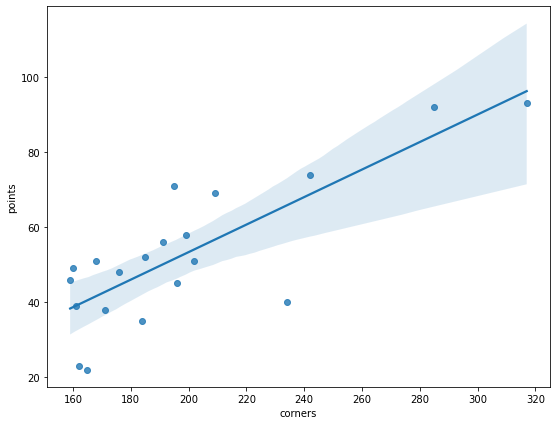

In [16]:
# corners as a predictor variable of points
width, height = 9,7
plt.figure(figsize = (width, height))
sns.regplot(x = "corners", y = "points", data = table)

From the regression plot we can see that corners and points have a positive correlation since as the number of corners
increase, the number of points tend to increase too. We can check their Person correlation coefficient and p-value

In [17]:
# calculating the Pearson coefficient
table[["corners", "points"]].corr()

,corners,points
corners,1.000000,0.806706
points,0.806706,1.000000


We can say that corners is a good predictor of points since they have a positive correlation of approx 0.81

It is again important to check for the probability that the value of correlation is statistically significant. This is done by calculating the P-value.

In [18]:
# calculating the p-value
from scipy import stats
pearson_coef, p_value = stats.pearsonr(table["corners"], table["points"])
print("The Pearson correlation coefficient is:", pearson_coef, "with a P-value of P =", p_value)

The Pearson correlation coefficient is: 0.8067059277632534 with a P-value of P = 1.7317751860971625e-05


Since the p-value is <0.05, we can say that there is moderate evidence that the correlation between corners and points is statistically significant although they have a very strong linear relationship of ~0.81

<AxesSubplot:xlabel='total_shots', ylabel='points'>

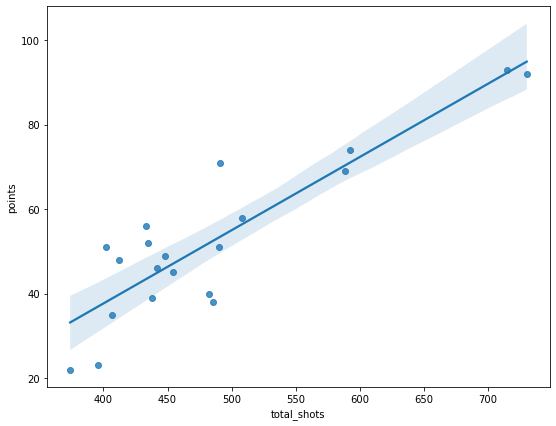

In [19]:
# total shots as a predictor variable of points
plt.figure(figsize = (width, height))
sns.regplot(x = "total_shots", y = "points", data = table)

From the regression plot,  we can see that there is a positve correlation between total shots and points since as the value of shots increase so does the points.

We can calculate the pearson correlation and p-value between shots and points and examine for statistical significance

In [20]:
# calculating pearson coefficient and p-value
pearson_coef, p_value = stats.pearsonr(table["total_shots"], table["points"])
print("The Person correlation coefficient is:", pearson_coef, "the p-value is P =", p_value)

The Person correlation coefficient is: 0.8862906300409944 the p-value is P = 1.9841949342310438e-07


The p-value is <0.05 hence there is a moderate evidence that the correlation between total shorts and points is ststistically significant although there is a very strong linear relationship of 0.89.

Examining shorts on target as predictor of points

<AxesSubplot:xlabel='shots_on_target', ylabel='points'>

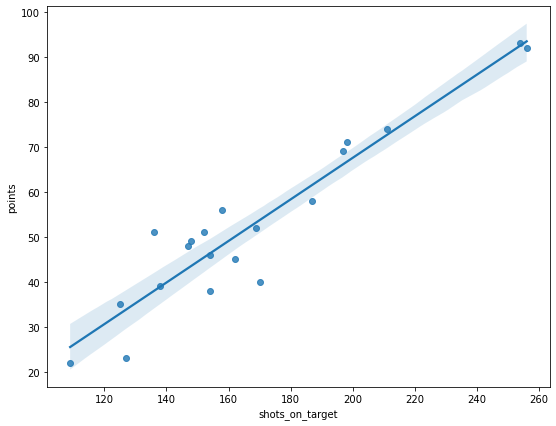

In [21]:
plt.figure(figsize = (width, height))
sns.regplot(x = "shots_on_target", y = "points", data = table)

We can see from the plot that there is a strong positive correlaton between shots on target and point.

In [22]:
# examining the correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(table["shots_on_target"], table["points"])
print("The Pearson correlation coefficient is:", pearson_coef, "the P-value is P =", p_value)

The Pearson correlation coefficient is: 0.9437325308693133 the P-value is P = 4.373610538838452e-10


The P-value is <0.001 hence there is a strong evidence that the correlation betweeen shots on target and points is statistically significant and there is a very strong linear relationship of ~0.94

So from the above statistical analysis we can conclude that shots on target is a better predictor varible compared to total shots and corners. This is because it has the lowest  p-vlaue and the highest pearson correlation compared to total shots and corners. However, we can still use all of them as predictors of points since they have all given a high positive correlation and proven to be statisticlly significant.

In [24]:
table.head(5)

,teams,fouls,yellow_cards,red_cards,FT_goals_scored,HT_goals_scored,total_shots,shots_on_target,corners,points
0,Brentford,371,61,3,48,16,442,154,159,46
1,Man United,395,75,2,57,22,508,187,199,58
2,Burnley,394,68,2,34,17,407,125,184,35
3,Chelsea,409,63,1,76,34,592,211,242,74
4,Everton,368,76,6,43,16,438,138,161,39
